<a href="https://colab.research.google.com/github/MStamirski/365DataScience-students/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
path = "drive/MyDrive/Colab_Notebooks/365Challenge/data/"

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
filenames = ['365_course_info', '365_course_ratings', '365_exam_info', '365_quiz_info', '365_student_engagement', '365_student_exams', '365_student_hub_questions', '365_student_info', '365_student_learning', '365_student_purchases', '365_student_quizzes']

In [ ]:
def read_data(filename):
  df = pd.read_csv(path+filename+".csv")
  for col in df.columns:
    if 'date' in col:
      df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')
  return df

In [ ]:
def show_data(filename, file):
  print("============= File: "+filename+" =============\n")
  print("\n------------- sample ----------------")
  print(file.sample(3))
  print("\n------------- info ------------------")
  print(file.info())
  print("\n------------- describe --------------")
  print(file.describe(include='all', datetime_is_numeric=True))
  print("\n\n")

In [ ]:
def histogram(dataframe,column):
  fig,ax=plt.subplots()
  ax.hist(dataframe[column],label=column,bins=20)
  ax.set_xlabel(column)
  ax.set_ylabel('Number of observations')
  plt.show()

def centiles_graph(dataframe, column, first,last):
  centiles=[np.quantile(dataframe[column],q/100) for q in range(first,last+1)]
  fig, ax = plt.subplots()
  ax.bar(range(first,last+1),centiles)
  plt.show()

def violin(dataframe, column):
  fig,ax=plt.subplots()
  ax.violinplot(dataframe[column])
  ax.set_xlabel(column)
  ax.set_ylabel('Number of observations')
  plt.show()

def describe(dataframe, column):
  print(dataframe[column].describe(datetime_is_numeric=True))
  print("Nulls",pd.isna(dataframe[column]).sum())
  print("Zeros", len(dataframe[dataframe[column]==0]))
  if dataframe[column].dtype != 'datetime64[ns]' and dataframe[column].dtype != 'object':
    print("Negatives", len(dataframe[dataframe[column]<0]))

def features_plot(dataframe, col):
  print(dataframe[col].value_counts())
  describe(dataframe, col)
  histogram(dataframe, col)
  if dataframe[col].dtype != 'datetime64[ns]' and dataframe[col].dtype != 'object':
    centiles_graph(dataframe,col,1,100)
    violin(dataframe, col)

# course_info

In [ ]:
course_info = read_data(filenames[0])
show_data(filenames[0], course_info)

============= File: 365_course_info =============


------------- sample ----------------
    course_id                              course_title
21         29  Product Management for AI & Data Science
31         42                             Data Strategy
0           2                   Introduction to Tableau

------------- info ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   course_id     46 non-null     int64 
 1   course_title  46 non-null     object
dtypes: int64(1), object(1)
memory usage: 864.0+ bytes
None

------------- describe --------------
        course_id             course_title
count   46.000000                       46
unique        NaN                       46
top           NaN  Introduction to Tableau
freq          NaN                        1
mean    31.043478                      NaN
std     16.279444   

46 different courses, only id will be needed, clean data

# course_ratings

In [ ]:
course_ratings = read_data(filenames[1])
show_data(filenames[1], course_ratings)

============= File: 365_course_ratings =============


------------- sample ----------------
      course_id  student_id  course_rating date_rated
529          28      272965              4 2022-06-29
2468         16      295127              4 2022-10-18
353          28      268926              3 2022-06-28

------------- info ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   course_id      2500 non-null   int64         
 1   student_id     2500 non-null   int64         
 2   course_rating  2500 non-null   int64         
 3   date_rated     2500 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 78.2 KB
None

------------- describe --------------
         course_id     student_id  course_rating  \
count  2500.000000    2500.000000    2500.000000   
mean     21.366800  280321.621200 

5    2097
4     321
3      58
2      19
1       5
Name: course_rating, dtype: int64
count    2500.000000
mean        4.794400
std         0.528621
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: course_rating, dtype: float64
Nulls 0
Zeros 0
Negatives 0


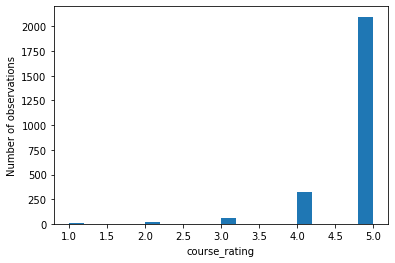

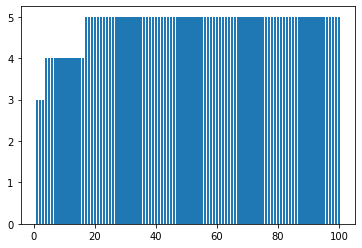

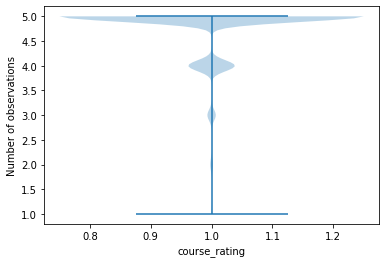

In [ ]:
features_plot(course_ratings, 'course_rating')

2022-08-17    134
2022-08-15     92
2022-08-16     91
2022-08-18     60
2022-10-18     45
             ... 
2022-09-12      9
2022-06-25      8
2022-07-01      8
2022-08-27      7
2022-09-05      7
Name: date_rated, Length: 127, dtype: int64
count                             2500
mean     2022-08-21 11:53:05.279999744
min                2022-06-16 00:00:00
25%                2022-07-26 00:00:00
50%                2022-08-17 00:00:00
75%                2022-09-24 00:00:00
max                2022-10-20 00:00:00
Name: date_rated, dtype: object
Nulls 0
Zeros 0


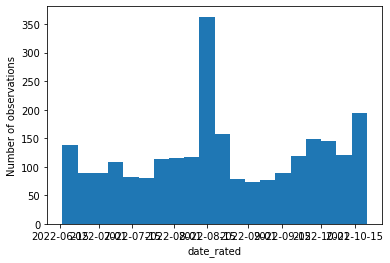

In [ ]:
features_plot(course_ratings, 'date_rated')

2500 entries, useful features: course_rating and date_rated, total rating for each course can be calculated, also rating of single user, clean data

# exam_info

In [ ]:
exam_info = read_data(filenames[2])
show_data(filenames[2], exam_info)

============= File: 365_exam_info =============


------------- sample ----------------
     exam_id  exam_category  exam_duration
6        312              2             30
150      829              2             25
60       653              2             10

------------- info ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   exam_id        156 non-null    int64
 1   exam_category  156 non-null    int64
 2   exam_duration  156 non-null    int64
dtypes: int64(3)
memory usage: 3.8 KB
None

------------- describe --------------
          exam_id  exam_category  exam_duration
count  156.000000     156.000000     156.000000
mean   643.384615       1.814103      30.737179
std    170.771096       0.707604      29.549327
min    118.000000       1.000000       5.000000
25%    542.750000       1.000000      13.500000
50%    696.500000

2    100
1     47
4      9
Name: exam_category, dtype: int64
count    156.000000
mean       1.814103
std        0.707604
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: exam_category, dtype: float64
Nulls 0
Zeros 0
Negatives 0


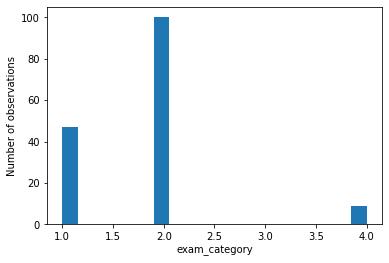

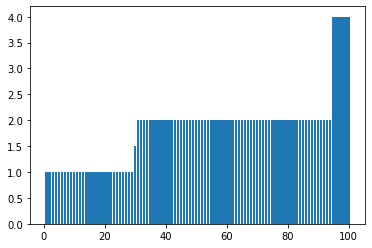

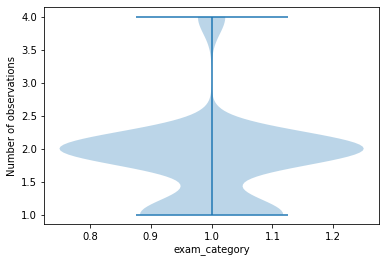

In [ ]:
features_plot(exam_info, 'exam_category')

20     19
15     14
25     14
10     14
12     11
30     11
14      7
16      7
8       6
45      5
18      4
40      4
35      4
130     4
5       3
120     3
6       3
50      3
75      3
110     2
65      2
9       2
70      2
26      2
80      2
90      1
60      1
85      1
55      1
100     1
Name: exam_duration, dtype: int64
count    156.000000
mean      30.737179
std       29.549327
min        5.000000
25%       13.500000
50%       20.000000
75%       31.250000
max      130.000000
Name: exam_duration, dtype: float64
Nulls 0
Zeros 0
Negatives 0


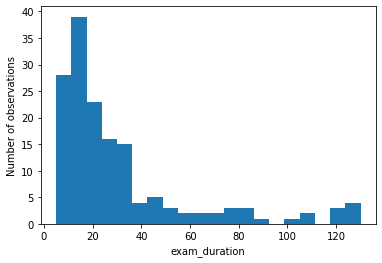

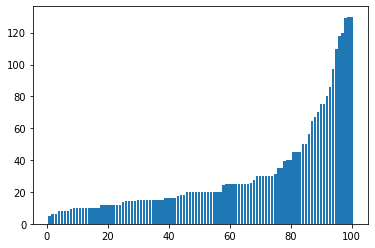

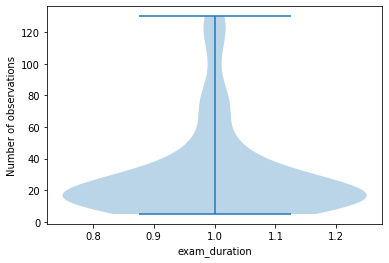

In [ ]:
features_plot(exam_info, 'exam_duration')

156 entries, useful features: exam_duration (right-side skewness) and exam_category (3 of them, type 2 is a mode), clean data

# quiz_info

In [ ]:
quiz_info = read_data(filenames[3])
show_data(filenames[3], quiz_info)

============= File: 365_quiz_info =============


------------- sample ----------------
      quiz_id  question_id  answer_id answer_correct
112        25           28        113              y
2458      423          633       2459              y
3493      345          889       3510              n

------------- info ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4741 entries, 0 to 4740
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   quiz_id         4741 non-null   int64 
 1   question_id     4741 non-null   int64 
 2   answer_id       4741 non-null   int64 
 3   answer_correct  4741 non-null   object
dtypes: int64(3), object(1)
memory usage: 148.3+ KB
None

------------- describe --------------
            quiz_id  question_id    answer_id answer_correct
count   4741.000000  4741.000000  4741.000000           4741
unique          NaN          NaN          NaN              2
top         

dataset needed only to calculate student results, clean data

# student_engagement

In [ ]:
student_engagement = read_data(filenames[4])
show_data(filenames[4], student_engagement)

============= File: 365_student_engagement =============


------------- sample ----------------
       engagement_id  student_id  engagement_quizzes  engagement_exams  \
3832          114720      263393                   1                 0   
9659          167110      259429                   0                 1   
35411         987203      268287                   0                 0   

       engagement_lessons date_engaged  
3832                    1   2022-02-14  
9659                    1   2022-03-31  
35411                   1   2022-07-12  

------------- info ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65371 entries, 0 to 65370
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   engagement_id       65371 non-null  int64         
 1   student_id          65371 non-null  int64         
 2   engagement_quizzes  65371 non-null  int64         
 3   engagement

no connection with id's of quizzes, exams and courses, clean data

# student_exams

In [ ]:
student_exams = read_data(filenames[5])
show_data(filenames[5], student_exams)

============= File: 365_student_exams =============


------------- sample ----------------
       exam_attempt_id  student_id  exam_id  exam_result  \
5052            189103      263783      440          100   
14004           206582      268926      403           83   
32541           237899      282739      696           83   

       exam_completion_time date_exam_completed  
5052                   0.47          2022-03-09  
14004                 21.25          2022-06-14  
32541                  7.33          2022-10-13  

------------- info ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34030 entries, 0 to 34029
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   exam_attempt_id       34030 non-null  int64         
 1   student_id            34030 non-null  int64         
 2   exam_id               34030 non-null  int64         
 3   exam_result           340

100    11004
83      6019
67      4851
50      3763
33      2437
       ...  
55         1
52         1
81         1
95         1
36         1
Name: exam_result, Length: 76, dtype: int64
count    34030.000000
mean        71.568998
std         28.579781
min          0.000000
25%         50.000000
50%         83.000000
75%        100.000000
max        100.000000
Name: exam_result, dtype: float64
Nulls 0
Zeros 1264
Negatives 0


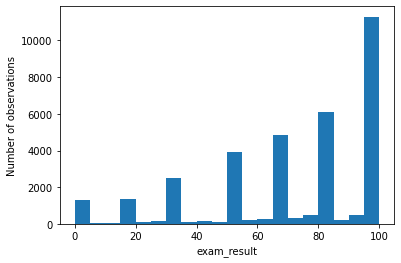

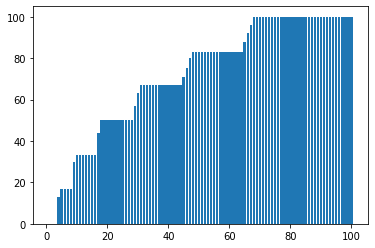

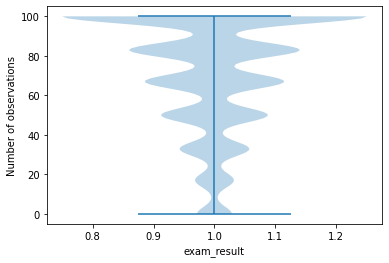

In [ ]:
features_plot(student_exams, 'exam_result')

10.00    369
20.00    350
25.00    324
0.45     300
0.47     290
        ... 
75.72      1
69.22      1
30.05      1
50.60      1
23.95      1
Name: exam_completion_time, Length: 2571, dtype: int64
count    34030.000000
mean         8.522312
std         13.670457
min          0.070000
25%          1.030000
50%          4.225000
75%         10.000000
max        198.120000
Name: exam_completion_time, dtype: float64
Nulls 0
Zeros 0
Negatives 0


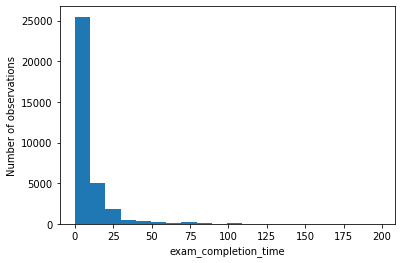

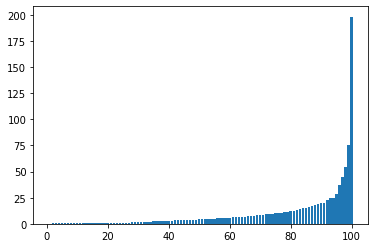

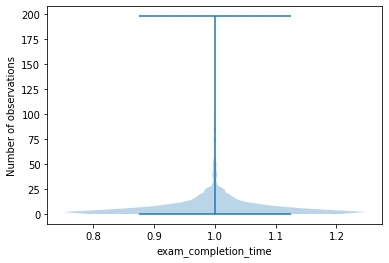

In [ ]:
features_plot(student_exams, 'exam_completion_time')

2022-08-17    1506
2022-08-16     878
2022-08-15     762
2022-08-18     554
2022-10-18     280
              ... 
2022-01-05      37
2022-01-03      33
2022-01-09      25
2022-01-01      10
2022-01-02       8
Name: date_exam_completed, Length: 293, dtype: int64
count                            34030
mean     2022-06-22 13:47:03.508668672
min                2022-01-01 00:00:00
25%                2022-04-13 00:00:00
50%                2022-07-11 00:00:00
75%                2022-08-21 00:00:00
max                2022-10-20 00:00:00
Name: date_exam_completed, dtype: object
Nulls 0
Zeros 0


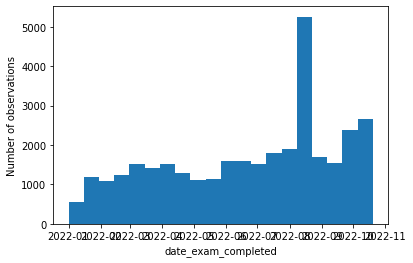

In [ ]:
features_plot(student_exams, 'date_exam_completed')

34030 entries, useful features: exam_results (left-side skewness), exam_completion_time (strong right-side skewness, outliers), date_exam_completed (mode in vacations?). Clean data except for outliers in exam_completion_time

# student_hub_questions

In [ ]:
student_hub_questions = read_data(filenames[6])
show_data(filenames[6], student_hub_questions)

============= File: 365_student_hub_questions =============


------------- sample ----------------
     hub_question_id  student_id date_question_asked
532             9627      260345          2022-08-18
697            10055      274861          2022-09-29
171             8609      260754          2022-04-13

------------- info ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   hub_question_id      827 non-null    int64         
 1   student_id           827 non-null    int64         
 2   date_question_asked  827 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 19.5 KB
None

------------- describe --------------
       hub_question_id     student_id            date_question_asked
count       827.000000     827.000000                            827
mean       9262.7255

2022-09-28    17
2022-08-16    15
2022-10-04    15
2022-09-30    13
2022-08-24    11
              ..
2022-08-07     1
2022-05-09     1
2022-08-01     1
2022-07-31     1
2022-01-03     1
Name: date_question_asked, Length: 249, dtype: int64
count                              827
mean     2022-07-03 09:24:09.576783616
min                2022-01-03 00:00:00
25%                2022-04-30 00:00:00
50%                2022-07-19 00:00:00
75%                2022-09-15 00:00:00
max                2022-10-20 00:00:00
Name: date_question_asked, dtype: object
Nulls 0
Zeros 0


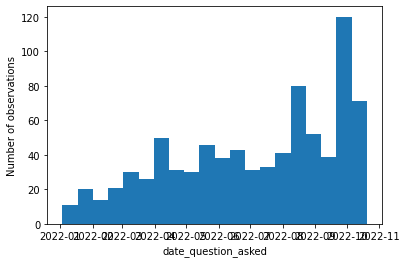

In [ ]:
features_plot(student_hub_questions, 'date_question_asked')

827 entries, useful feature: date_question_asked (growing number), clean data

# student_info

In [ ]:
student_info = read_data(filenames[7])
show_data(filenames[7], student_info)

============= File: 365_student_info =============


------------- sample ----------------
       student_id student_country date_registered
19900      279356              SA      2022-06-26
8271       267266              TR      2022-03-14
17498      276879              BG      2022-06-07

------------- info ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35230 entries, 0 to 35229
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_id       35230 non-null  int64         
 1   student_country  35217 non-null  object        
 2   date_registered  35230 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 825.8+ KB
None

------------- describe --------------
           student_id student_country                date_registered
count    35230.000000           35217                          35230
unique            NaN             180       

2022-08-15    716
2022-08-16    477
2022-06-02    431
2022-08-17    272
2022-08-11    230
             ... 
2022-07-24     69
2022-03-25     68
2022-09-27     64
2022-05-28     60
2022-03-26     58
Name: date_registered, Length: 293, dtype: int64
count                            35230
mean     2022-06-02 10:30:14.408174592
min                2022-01-01 00:00:00
25%                2022-03-18 00:00:00
50%                2022-06-08 00:00:00
75%                2022-08-15 00:00:00
max                2022-10-20 00:00:00
Name: date_registered, dtype: object
Nulls 0
Zeros 0


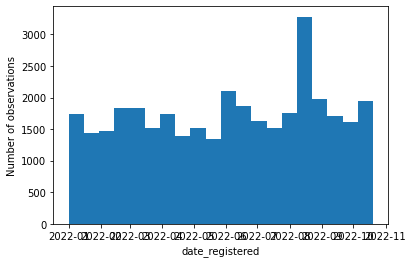

In [ ]:
features_plot(student_info, 'date_registered')

In [ ]:
features_plot(student_info, 'student_country')

IN    6933
US    4768
EG    3003
GB    1748
NG    1718
      ... 
SR       1
RE       1
BI       1
GY       1
BM       1
Name: student_country, Length: 180, dtype: int64
count     35217
unique      180
top          IN
freq       6933
Name: student_country, dtype: object
Nulls 13
Zeros 0


35230 entries, useful feature: date_registered (growing number, mode in vacations?), clean data (except for country, but this feature will not affect the model)

# student_learning

In [ ]:
student_learning = read_data(filenames[8])
show_data(filenames[8], student_learning)

============= File: 365_student_learning =============


------------- sample ----------------
       student_id  course_id  minutes_watched date_watched
20485      266862          3             30.6   2022-03-11
2244       259767          5             29.0   2022-07-11
52895      284797          7             41.4   2022-08-11

------------- info ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_id       64535 non-null  int64         
 1   course_id        64535 non-null  int64         
 2   minutes_watched  64535 non-null  float64       
 3   date_watched     64535 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.0 MB
None

------------- describe --------------
          student_id     course_id  minutes_watched  \
count   64535.000000  64535.000000  

0.1      2610
0.2      1407
0.3      1025
0.4       870
0.5       682
         ... 
149.6       1
172.8       1
162.8       1
213.0       1
214.6       1
Name: minutes_watched, Length: 2215, dtype: int64
count    64535.000000
mean        28.545392
std         40.580553
min          0.000000
25%          3.800000
50%         15.900000
75%         38.100000
max       1710.600000
Name: minutes_watched, dtype: float64
Nulls 0
Zeros 3
Negatives 0


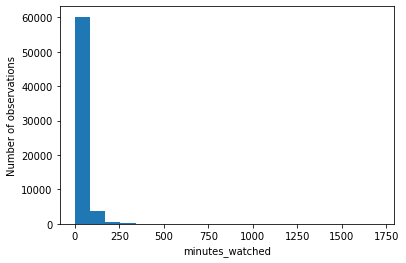

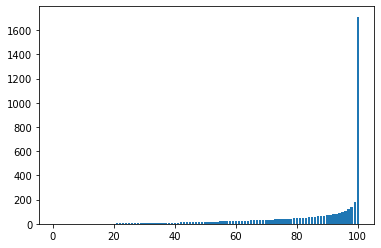

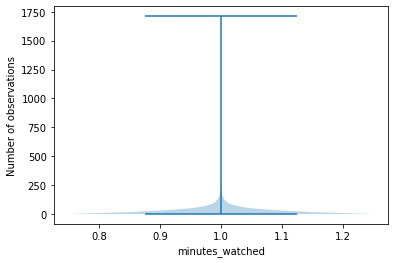

In [ ]:
features_plot(student_learning, 'minutes_watched')

2022-08-16    795
2022-08-15    794
2022-08-17    718
2022-08-18    565
2022-10-10    396
             ... 
2022-01-07     85
2022-01-04     84
2022-01-09     83
2022-01-02     74
2022-01-01     55
Name: date_watched, Length: 293, dtype: int64
count                            64535
mean     2022-06-18 19:32:59.818703104
min                2022-01-01 00:00:00
25%                2022-04-10 00:00:00
50%                2022-06-29 00:00:00
75%                2022-08-26 00:00:00
max                2022-10-20 00:00:00
Name: date_watched, dtype: object
Nulls 0
Zeros 0


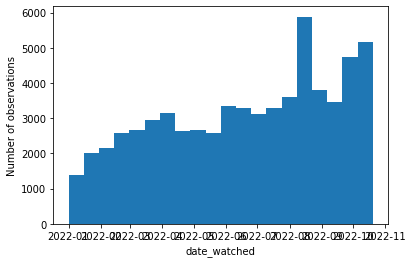

In [ ]:
features_plot(student_learning, 'date_watched')

64535 entries, useful features: minutes_watched (strong right-side skewness, outliers), date_watched (growing number, mode in vacations?). clean data except for the outliers in minutes_watched

# student_purchases

In [ ]:
student_purchases = read_data(filenames[9])
show_data(filenames[9], student_purchases)

============= File: 365_student_purchases =============


------------- sample ----------------
      purchase_id  student_id purchase_type date_purchased
2462        22019      283414       Monthly     2022-09-01
2800        22692      292585        Annual     2022-09-29
2372        21783      285915       Monthly     2022-08-22

------------- info ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   purchase_id     3041 non-null   int64         
 1   student_id      3041 non-null   int64         
 2   purchase_type   3041 non-null   object        
 3   date_purchased  3041 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 95.2+ KB
None

------------- describe --------------
         purchase_id     student_id purchase_type  \
count    3041.000000    3041.000000         

In [ ]:
features_plot(student_purchases, 'purchase_type')

Annual       1547
Monthly      1444
Quarterly      50
Name: purchase_type, dtype: int64
count       3041
unique         3
top       Annual
freq        1547
Name: purchase_type, dtype: object
Nulls 0
Zeros 0


2022-05-31    45
2022-09-29    41
2022-07-26    40
2022-06-01    38
2022-03-30    36
              ..
2022-09-11     3
2022-09-03     2
2022-05-02     2
2022-01-30     1
2022-01-29     1
Name: date_purchased, Length: 293, dtype: int64
count                             3041
mean     2022-06-05 08:59:20.933903360
min                2022-01-01 00:00:00
25%                2022-03-30 00:00:00
50%                2022-06-05 00:00:00
75%                2022-08-13 00:00:00
max                2022-10-20 00:00:00
Name: date_purchased, dtype: object
Nulls 0
Zeros 0


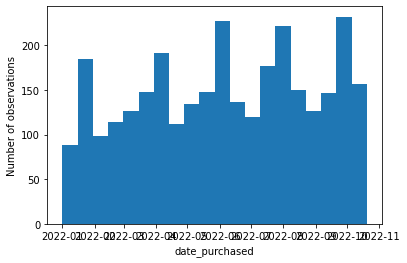

In [ ]:
features_plot(student_purchases, 'date_purchased')

3041 entries, purchase_type is outside of the scope, useful feature: date_purchased (cyclical - depends on events?), clean data

# student_quizzes

In [ ]:
student_quizzes = read_data(filenames[10])
show_data(filenames[10], student_quizzes)

============= File: 365_student_quizzes =============


------------- sample ----------------
        student_id  quiz_id  question_id  answer_id
141102      280644      546         1048     4140.0
91104       260861      295          420     1661.0
56527       274267      400          587     2278.0

------------- info ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147029 entries, 0 to 147028
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   student_id   147029 non-null  int64  
 1   quiz_id      147029 non-null  int64  
 2   question_id  147029 non-null  int64  
 3   answer_id    146800 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 4.5 MB
None

------------- describe --------------
          student_id        quiz_id    question_id      answer_id
count  147029.000000  147029.000000  147029.000000  146800.000000
mean   274241.378864     302.003999     665.227323    2613.594149

3139.0    4618
3095.0    4136
3080.0    3319
3078.0    3266
3087.0    3181
          ... 
1169.0       1
4632.0       1
4623.0       1
4608.0       1
3806.0       1
Name: answer_id, Length: 1882, dtype: int64
count    146800.000000
mean       2613.594149
std        1298.666048
min          85.000000
25%        1420.000000
50%        3087.000000
75%        3267.000000
max        4755.000000
Name: answer_id, dtype: float64
Nulls 229
Zeros 0
Negatives 0


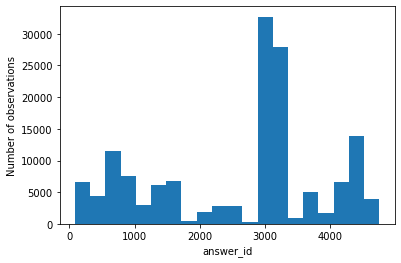

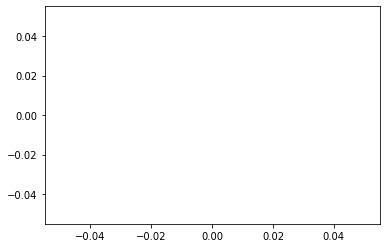

/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


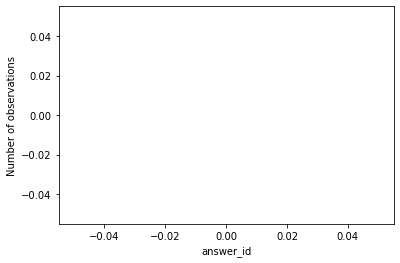

In [ ]:
features_plot(student_quizzes, 'answer_id')

147029 entries, dataset needed only to calculate student results. Clean data except for answer_id (229 nulls and type float instead of int)